In [1]:
%matplotlib inline
import sys
sys.path.append('../')
from src.LRGSG_package.LRGSG import *

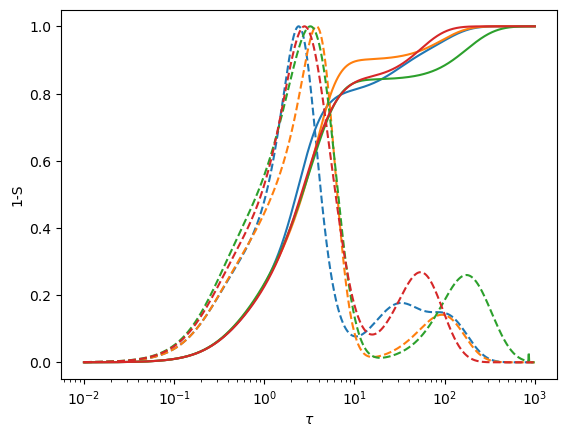

In [35]:
N = 1000
k = 8
p = k/N
rw_p = 0.2
G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)
rmax = 5
t1Sm1Avg = []
t1CsAvg = []
for r in [i/rmax for i in range(rmax)]:
    G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)
    labelList = [i for i in range(G.number_of_nodes())]
    if not nx.is_connected(G):
        continue
    for e in G.edges():
        G.add_edge(e[0], e[1], weight=1)
        if np.random.random(1) < rw_p:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label='ER-05')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
             color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1/np.max(dS1)])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')

plt.xscale('log')


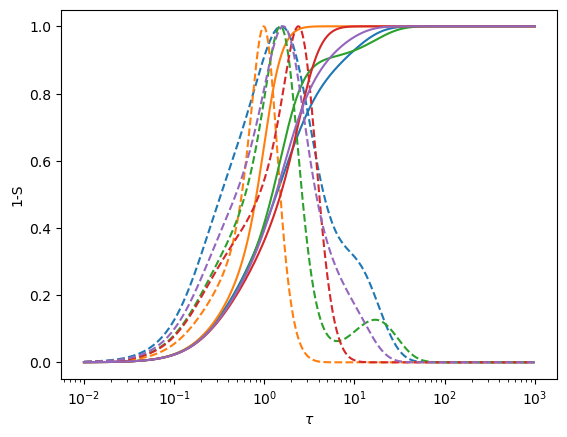

In [18]:
N = 1000
k = 20
p = k/N
rw_p = 0.45
G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)
rmax = 5
t1Sm1Avg = []
t1CsAvg = []
for r in [i/rmax for i in range(rmax)]:
    G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)
    labelList = [i for i in range(G.number_of_nodes())]
    if not nx.is_connected(G):
        continue
    for e in G.edges():
        G.add_edge(e[0], e[1], weight=1)
        if np.random.random(1) < rw_p:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label='ER-05')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
             color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1/np.max(dS1)])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')

plt.xscale('log')


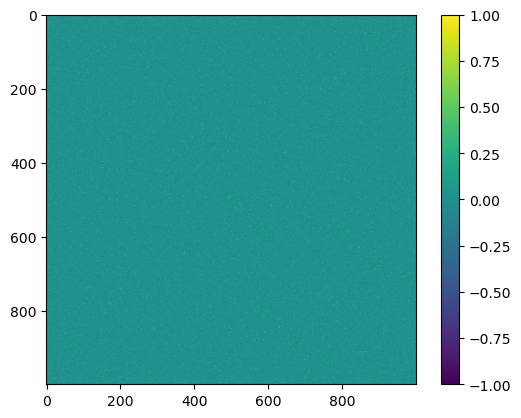

In [9]:
plt.imshow(nx.adjacency_matrix(G).toarray())
plt.colorbar()

In [ ]:
# laplacian, spectrum and densities
linkage_matrix, w = MakeLinkageMatrix(
    G, tau=1e0, is_signed=True, method="ward")
#
tmin = linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax = linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]

In [ ]:
# utils
dentroOpts = {'leaf_rotation': 0,
              'orientation': 'right',
              'above_threshold_color': 'k',
              'leaf_font_size': 10,
              'labels': labelList}


In [ ]:
ax_dict = plt.figure(constrained_layout=True,
                     figsize=(24, 12)).subplot_mosaic("A")

dendrogram(linkage_matrix, labels=labelList, ax=ax_dict['A'], leaf_font_size=20)
# CM = fcluster(linkage_matrix, t=0.6, criterion='distance')
# cmap = build_colormap(MiscPalette.TONKA, True)
# cmap1 = cmap(np.linspace(0, 1, np.max(CM)))
# cmap1[0]=[0., 175/255., 187/255., 1.]
# cmap1[1]=[252/255., 78/255., 7/255., 1.]
# hierarchy.set_link_color_palette([mplc.rgb2hex(rgb[:3]) for rgb in cmap1])
# ax_dict['A'].axvline(x=tresh, color='#ED2939', linestyle='--')
# ax_dict['A'].set_xlim(tmin, tmax)

# ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
# ax_dict['A'].set_ylabel('Node index')
# ax_dict['A'].set_yscale('log')
# ax_dict['A'].set_xticks([1e0])


plt.show()


In [36]:
nx.draw(G, node_size=300, with_labels=True)

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>